UPLOAD LIBRARY

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive


MOUNT GOOGLE DRIVE

In [ ]:
sns.set(style="whitegrid", palette="muted", font_scale=1.1)

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


LOAD DATASET DARI GOOGLE DRIVE

In [ ]:
file_path = '/content/drive/MyDrive/Colab Notebooks/top twitch streamer.xlsx'
df = pd.read_excel(file_path, engine='openpyxl')
df_before = pd.read_excel(file_path)

### MERAPIKAN NAMA KOLOM


In [ ]:
df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_").str.replace("-", "_")
print("Kolom dataset:", df.columns.tolist())

Kolom dataset: ['rank', 'name', 'language', 'type', 'most_streamed_game', '2nd_most_streamed_game', 'average_stream_duration', 'followers_gained_per_stream', 'avg_viewers_per_stream', 'avg_games_per_stream', 'total_time_streamed', 'total_followers', 'total_views', 'total_games_streamed', 'active_days_per_week', 'most_active_day', 'day_with_most_followers_gained']


## MENGECEK KONDISI DATA

In [ ]:
print("=== Info Dataset ===")
print(df.info())
print("\n=== 5 Data Teratas ===")
print(df.head())

=== Info Dataset ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   rank                            999 non-null    int64  
 1   name                            999 non-null    object 
 2   language                        999 non-null    object 
 3   type                            999 non-null    object 
 4   most_streamed_game              999 non-null    object 
 5   2nd_most_streamed_game          922 non-null    object 
 6   average_stream_duration         999 non-null    float64
 7   followers_gained_per_stream     999 non-null    int64  
 8   avg_viewers_per_stream          999 non-null    int64  
 9   avg_games_per_stream            999 non-null    float64
 10  total_time_streamed             999 non-null    int64  
 11  total_followers                 999 non-null    int64  
 12  total_views    

## CEK MISSING VALUE

In [ ]:
print("\n=== Missing Value ===")
print(df.isnull().sum())


=== Missing Value ===
rank                               0
name                               0
language                           0
type                               0
most_streamed_game                 0
2nd_most_streamed_game            77
average_stream_duration            0
followers_gained_per_stream        0
avg_viewers_per_stream             0
avg_games_per_stream               0
total_time_streamed                0
total_followers                    0
total_views                        0
total_games_streamed               0
active_days_per_week               0
most_active_day                    0
day_with_most_followers_gained     0
dtype: int64


# **DATA CLEANSING - DEDUPLIKASI DATA**
Mengapus data yang duplikat

In [ ]:
df_no_rank = df.drop(columns=["rank"], errors="ignore")

# Cari data duplikat (abaikan rank)
duplicates = df[df_no_rank.duplicated(keep=False)]
print(f"Jumlah data duplikat (tanpa hitung rank): {duplicates.shape[0]}")
print("\nData duplikat:")
print(duplicates.head(15))
df_cleaned = df.loc[~df_no_rank.duplicated()]

print(f"\nJumlah data setelah hapus duplikat: {df_cleaned.shape[0]}")

Jumlah data duplikat (tanpa hitung rank): 4

Data duplikat:
     rank       name language         type most_streamed_game  \
64     66  elmariana  Spanish  personality      Just Chatting   
158   160  roger9527  Chinese  personality        Hearthstone   
178   180  roger9527  Chinese  personality        Hearthstone   
960   962  elmariana  Spanish  personality      Just Chatting   

    2nd_most_streamed_game  average_stream_duration  \
64               Minecraft                      3.7   
158      League of Legends                      7.5   
178      League of Legends                      7.5   
960              Minecraft                      3.7   

     followers_gained_per_stream  avg_viewers_per_stream  \
64                         11093                   38471   
158                         3330                   33004   
178                         3330                   33004   
960                        11093                   38471   

     avg_games_per_stream  total_time

### STANDARISASI KOLOM TOTAL FOLLOWERS DAN TOTAL VIEWS
- Menambahkan kolom baru untuk memudahkan dalam membaca data
- Tidak menghilangkan versi numerik agar memudahkan dalam perhitungan data

In [ ]:
# Simpan versi numeric
df["total_followers_num"] = pd.to_numeric(df["total_followers"], errors="coerce")
df["total_views_num"] = pd.to_numeric(df["total_views"], errors="coerce")

# Fungsi format ke K/M
def format_km(value):
    if pd.isna(value) or value == 0:
        return "-"
    elif value >= 1_000_000:
        return f"{value/1_000_000:.2f}M"
    elif value >= 1_000:
        return f"{value/1_000:.0f}K"
    else:
        return str(int(value))

df["f_display"] = df["total_followers_num"].apply(format_km)
df["v_display"] = df["total_views_num"].apply(format_km)

comparison = df[[
    "name",
    "total_followers", "f_display",
    "total_views", "v_display"
]].head(15)  # ambil 15 baris pertama biar ringkas

print("Perbandingan sebelum dan sesudah formatting:")
print(comparison)

Perbandingan sebelum dan sesudah formatting:
                name  total_followers f_display  total_views v_display
0           kaicenat         10600000    10.60M      9150000     9.15M
1             jynxzi          5760000     5.76M      1950000     1.95M
2            caedrel           797000      797K     14200000    14.20M
3            caseoh_          4220000     4.22M           53        53
4               ibai         15600000    15.60M    359000000   359.00M
5          auronplay         16300000    16.30M    263000000   263.00M
6            zerator          1570000     1.57M    156000000   156.00M
7              tarik          3110000     3.11M     93300000    93.30M
8          riotgames          6860000     6.86M      1339000     1.34M
9         papaplatte          2410000     2.41M     92800000    92.80M
10  dota2_paragon_ru           352000      352K            0         -
11        aminematue          2590000     2.59M     14900000    14.90M
12  kato_junichi0817           9

## DATA CLEANSING - STANDARISASI KOLOM BAHASA
- Mengubah misalnya EN menjadi English

In [ ]:
# Mapping bahasa sebelum sesudah
lang_map = {
    "EN": "English",
    "ES": "Spanish",
    "FR": "French",
    "DE": "German",
    "ID": "Indonesian",
    "PT": "Portuguese",
    "RU": "Russian",
    "JP": "Japanese",
    "KR": "Korean",
}
df["language_sesudah"] = df["language"].replace(lang_map)
df_changed = df[df["language"] != df["language_sesudah"]]
print(df_changed[["name", "language", "language_sesudah"]].head(15))


               name language language_sesudah
73           forsen       EN          English
89   fissure_cs_eng       EN          English
154    davooxeneize       ES          Spanish
159   juansguarnizo       ES          Spanish
213         hutchmf       EN          English
224      brawlhalla       EN          English


## DATA ENRICHMENT - MENGISI ANGKA 0 YANG ADA PADA KOLOM
- Mengisi angka viewers dan followers yang memiliki nilai 0 dengan menggunakan mean


In [ ]:
import pandas as pd

# Pastikan kolom numerik jadi float
for col in df.select_dtypes(include=['number']).columns:
    df[col] = df[col].astype(float)

changed_rows = []

for col in df.columns:
    if pd.api.types.is_numeric_dtype(df[col]):
        if (df[col] == 0).any():   # hanya kolom yang punya nilai 0
            mean_val = df[df[col] > 0][col].mean()

            # ambil baris sebelum
            before = df[df[col] == 0][[col]].copy()
            before["Kolom"] = col
            before["Sesudah"] = mean_val

            # update dataframe
            df.loc[df[col] == 0, col] = mean_val

            # simpan perubahan
            before = before.rename(columns={col: "Sebelum"})
            changed_rows.append(before)

# Gabungkan hasil
if changed_rows:
    result = pd.concat(changed_rows, axis=0)
    print("=== Data yang berubah (sebelum → sesudah) ===")
    print(result.head(10))  # tampilkan 10 baris pertama
else:
    print("Tidak ada nilai 0 yang ditemukan.")


=== Data yang berubah (sebelum → sesudah) ===
     Sebelum                        Kolom       Sesudah
568      0.0  followers_gained_per_stream   3419.186492
588      0.0  followers_gained_per_stream   3419.186492
664      0.0  followers_gained_per_stream   3419.186492
767      0.0  followers_gained_per_stream   3419.186492
872      0.0  followers_gained_per_stream   3419.186492
3        0.0       avg_viewers_per_stream  21956.910125
10       0.0       avg_viewers_per_stream  21956.910125
24       0.0       avg_viewers_per_stream  21956.910125
31       0.0       avg_viewers_per_stream  21956.910125
36       0.0       avg_viewers_per_stream  21956.910125


## DATA ENRICHMENT - MENGISI DATA KOSONG PADA KOLOM 2ND GAMES
- Ada beberapa streamer yang hanya memainkan 1 game
- Mengisi dengan None

In [ ]:
none_rows = df[df["2nd_most_streamed_game"] == "None"][[
    "name", "most_streamed_game", "2nd_most_streamed_game"
]]

print("=== Data yang awalnya kosong lalu jadi 'None' ===")
print(none_rows.head(15))  # tampilkan 15 baris pertama


=== Data yang awalnya kosong lalu jadi 'None' ===
                  name most_streamed_game 2nd_most_streamed_game
10    dota2_paragon_ru             Dota 2                   None
18        lolpacifictw  League of Legends                   None
19           pgl_dota2             Dota 2                   None
31      legendus_shaka   Street Fighter 6                   None
46        rocketleague      Rocket League                   None
56   valorant_americas           Valorant                   None
58          goa7league      Just Chatting                   None
89      fissure_cs_eng     Counter-Strike                   None
94           esl_dota2             Dota 2                   None
109   valorant_pacific           Valorant                   None
117           warcraft  World of Warcraft                   None
123             eslcsb     Counter-Strike                   None
124      valorant_emea           Valorant                   None
169           fortnite           Fortnit

BERSIHKAN DATA ( HAPUS ROW KOSONG DI KOLOM PENTING )

In [ ]:
df = df.dropna(subset=["average_stream_duration", "total_time_streamed"])

MENYIMPAN DATA YANG SUDAH DI PROSES

In [ ]:
output_path = "/content/drive/MyDrive/Colab Notebooks/streamer_data_bersih.xlsx"

# Simpan ke Excel
df.to_excel(output_path, index=False)

print("\ Dataset bersih disimpan di:", output_path)



✅ Dataset bersih disimpan di: /content/drive/MyDrive/Colab Notebooks/streamer_data_bersih.xlsx


MENAMPILKAN BEBERAPA DATA YANG SUDAH DI CLEASING

In [ ]:
print("\nContoh data bersih:")
display(df.head(10))


Contoh data bersih:


,rank,name,language,type,most_streamed_game,2nd_most_streamed_game,average_stream_duration,followers_gained_per_stream,avg_viewers_per_stream,avg_games_per_stream,...,total_views,total_games_streamed,active_days_per_week,most_active_day,day_with_most_followers_gained,total_followers_num,total_views_num,f_display,v_display,language_sesudah
0,1.0,kaicenat,English,personality,Just Chatting,I'm Only Sleeping,7.6,18405.0,15852.000000,2.3,...,9150000.0,194.0,3.6,Friday,Saturday,10600000.0,9150000.0,10.60M,9.15M,English
1,2.0,jynxzi,English,personality,Tom Clancy's Rainbow Six Siege,NBA 2K20,5.4,3386.0,1145.000000,1.2,...,1950000.0,54.0,5.6,Tuesday,Sunday,5760000.0,1950000.0,5.76M,1.95M,English
2,3.0,caedrel,English,personality,League of Legends,I'm Only Sleeping,6.3,689.0,12331.000000,1.3,...,14200000.0,111.0,2.8,Thursday,Sunday,797000.0,14200000.0,797K,14.20M,English
3,4.0,caseoh_,English,personality,NBA 2K23,Just Chatting,4.6,7185.0,21956.910125,3.6,...,53.0,385.0,6.2,Friday,Monday,4220000.0,53.0,4.22M,53,English
4,5.0,ibai,Spanish,personality,Just Chatting,League of Legends,4.1,8289.0,190714.000000,1.5,...,359000000.0,149.0,4.3,Wednesday,Saturday,15600000.0,359000000.0,15.60M,359.00M,Spanish
5,6.0,auronplay,Spanish,personality,Minecraft,Just Chatting,3.7,1326.0,213849.000000,1.8,...,263000000.0,169.0,5.0,Wednesday,Sunday,16300000.0,263000000.0,16.30M,263.00M,Spanish
6,7.0,zerator,French,personality,World of Warcraft,VALORANT,5.1,6670.0,70813.000000,1.6,...,156000000.0,448.0,5.0,Sunday,Sunday,1570000.0,156000000.0,1.57M,156.00M,French
7,8.0,tarik,English,personality,VALORANT,Counter-Strike,7.6,2013.0,6043.000000,1.3,...,93300000.0,78.0,3.7,Thursday,Sunday,3110000.0,93300000.0,3.11M,93.30M,English
8,9.0,riotgames,English,esports,League of Legends,League of Legends: Wild Rift,8.5,3434.0,346968.000000,1.0,...,1339000.0,8.0,2.8,Saturday,Sunday,6860000.0,1339000.0,6.86M,1.34M,English
9,10.0,papaplatte,German,personality,Just Chatting,Minecraft,7.6,1273.0,48758.000000,2.8,...,92800000.0,503.0,4.7,Wednesday,Saturday,2410000.0,92800000.0,2.41M,92.80M,German


VISUALISASI DATA BAHASA YANG PALING BANYAK DIPAKAI

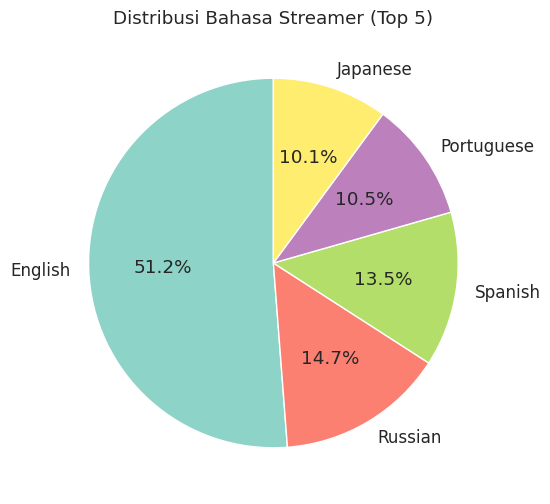

In [ ]:
plt.figure(figsize=(6,6))
df["language"].value_counts().head(5).plot.pie(autopct="%1.1f%%", startangle=90, cmap="Set3")
plt.title("Distribusi Bahasa Streamer (Top 5)")
plt.ylabel("")
plt.show()


VISUALISASI TOP 10 STREAMER DENGAN FOLLOWERS TERBANYAK

/tmp/ipython-input-2485084301.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top10_followers,


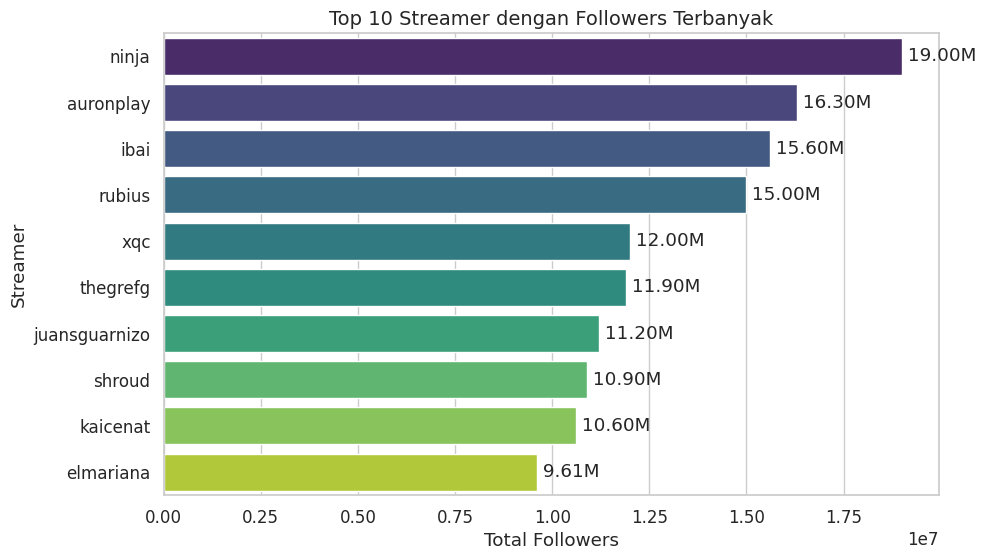

In [ ]:
top10_followers = df.nlargest(10, "total_followers_num")

plt.figure(figsize=(10,6))
sns.barplot(data=top10_followers,
            x="total_followers_num",
            y="name",
            palette="viridis")

# Tambah label pakai versi display
for i, v in enumerate(top10_followers["total_followers_display"]):
    plt.text(top10_followers["total_followers_num"].iloc[i], i, f" {v}", va="center")

plt.title("Top 10 Streamer dengan Followers Terbanyak", fontsize=14)
plt.xlabel("Total Followers")
plt.ylabel("Streamer")
plt.show()


KATEGORI TYPE STREAMER

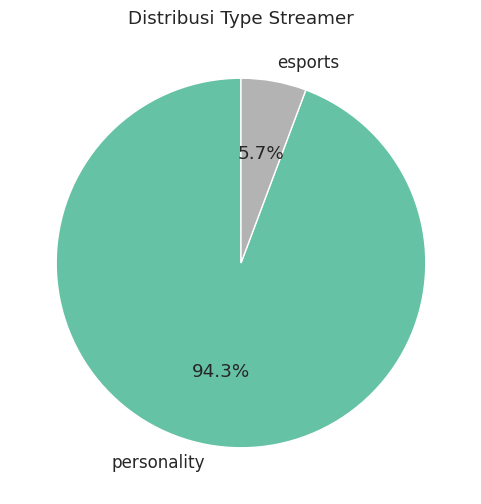

In [ ]:
plt.figure(figsize=(6,6))
df["type"].value_counts().plot.pie(autopct="%1.1f%%", startangle=90, cmap="Set2")
plt.title("Distribusi Type Streamer")
plt.ylabel("")
plt.show()


GAMES YANG PALING BANYAK DIMAINKAN

/tmp/ipython-input-864035238.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y="most_streamed_game", order=df["most_streamed_game"].value_counts().head(10).index, palette="viridis")


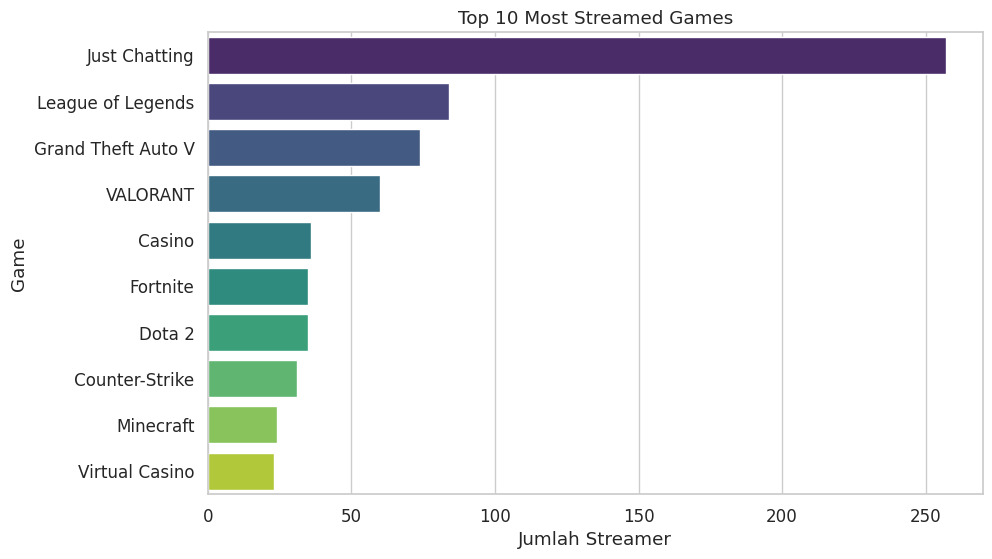

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot(data=df, y="most_streamed_game", order=df["most_streamed_game"].value_counts().head(10).index, palette="viridis")
plt.title("Top 10 Most Streamed Games")
plt.xlabel("Jumlah Streamer")
plt.ylabel("Game")
plt.show()